In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, metrics
import ast
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Functions

In [15]:
def display_training_plot(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

## Raw data

In [16]:
df_old = pd.read_csv('prepared_data/back.csv')
df_old

,Unnamed: 0,Category,Accelerometer,Gyroscope,Magnetometer,Duration
0,0,CLIMBING,"[[-6.850950241088867, 6.60105037689209, -1.287...","[[0.29122498631477356, 0.5505499839782715, 0.2...","[[65.8125, -19.012500762939453, 16.80000114440...",20
1,1,FALLING,"[[-5.451000213623047, 7.82895040512085, 1.9920...","[[-0.07741250097751617, 0.2190375030040741, -0...","[[32.34375, -38.94375228881836, -29.3437519073...",70
2,2,SUCCESSFULL,"[[6.903000354766846, -1.7880001068115234, -4.9...","[[-0.23718750476837158, 0.36121249198913574, 0...","[[-37.91250228881836, 10.143750190734863, -6.3...",85
3,3,WALKING,"[[-6.942000389099121, 5.0400004386901855, -0.0...","[[0.1816374957561493, -0.605412483215332, 0.25...","[[34.14375305175781, -34.20000076293945, 15.95...",25
4,4,CLIMBING,"[[-6.130050182342529, 6.98805046081543, 2.9569...","[[0.11261250078678131, 0.16541250050067902, -0...","[[30.187501907348633, -6.056250095367432, -4.1...",50
5,5,FALLING,"[[-5.57295036315918, 7.07205057144165, 1.01295...","[[0.46131250262260437, 0.5150749683380127, -0....","[[32.34375, -40.38750076293945, -23.2875003814...",2
6,6,SUCCESSFULL,"[[6.709050178527832, -7.123950481414795, -0.58...","[[0.08277499675750732, -0.210099995136261, -0....","[[-26.45625114440918, 22.087501525878906, -27....",85
7,7,WALKING,"[[-3.0010502338409424, 7.975050449371338, 0.62...","[[-0.16554999351501465, -1.0306999683380127, -...","[[21.11250114440918, -35.75625228881836, 12.90...",25
8,8,CLIMBING,"[[-7.414050579071045, 7.0819501876831055, 1.23...","[[0.489362508058548, -0.05211250111460686, -0....","[[32.04375076293945, -19.743751525878906, -18....",60
9,9,FALLING,"[[-4.780050277709961, 6.909000396728516, 0.280...","[[-0.20446249842643738, 0.1387374997138977, 0....","[[37.80000305175781, -22.856250762939453, -12....",2


In [17]:
# Convert string to list of list of floats
df_old['Accelerometer'] = df_old['Accelerometer'].apply(eval)
df_old['Gyroscope'] = df_old['Gyroscope'].apply(eval)
df_old['Magnetometer'] = df_old['Magnetometer'].apply(eval)

# Find the maximum length among the sequences
max_length = max(
    df_old['Accelerometer'].apply(len).max(),
    df_old['Gyroscope'].apply(len).max(),
    df_old['Magnetometer'].apply(len).max()
)

In [72]:
# Create empty arrays to store the masked sequences
X_accelerometer = np.zeros((len(df_old), max_length, 3))
X_gyroscope = np.zeros((len(df_old), max_length, 3))
X_magnetometer = np.zeros((len(df_old), max_length, 3))

# Mask the sequences with zeros
for i, (acc, gyr, mag) in enumerate(zip(df_old['Accelerometer'], df_old['Gyroscope'], df_old['Magnetometer'])):
    X_accelerometer[i, :len(acc)] = acc
    X_gyroscope[i, :len(gyr)] = gyr
    X_magnetometer[i, :len(mag)] = mag

# Split data into features (X) and labels (y)
y = df_old['Category'].values

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_accelerometer, y, test_size=0.4, random_state=42)

# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create the LSTM model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(max_length * 3,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile and train the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
history_raw = model.fit(X_train, y_train, epochs=200, batch_size=1)

Epoch 1/200
19/19 [==============================] - 1s 4ms/step - loss: 13.4569 - accuracy: 0.3684
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 1.6154 - accuracy: 0.7895
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 1.1389 - accuracy: 0.8947
Epoch 4/200
19/19 [==============================] - 0s 5ms/step - loss: 0.0607 - accuracy: 0.9474
Epoch 5/200
19/19 [==============================] - 0s 8ms/step - loss: 1.7515e-05 - accuracy: 1.0000
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 5.6764e-05 - accuracy: 1.0000
Epoch 7/200
19/19 [==============================] - 0s 6ms/step - loss: 5.0296e-05 - accuracy: 1.0000
Epoch 8/200
19/19 [==============================] - 0s 6ms/step - loss: 3.2911e-05 - accuracy: 1.0000
Epoch 9/200
19/19 [==============================] - 0s 5ms/step - loss: 2.5053e-05 - accuracy: 1.0000
Epoch 10/200
19/19 [==============================] - 0s 6ms/step - loss: 2.1993e-05 - a

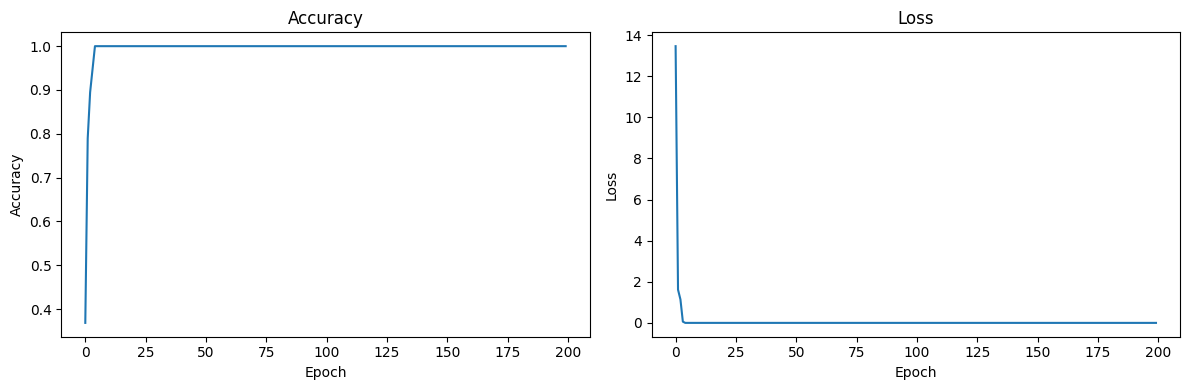

In [73]:
display_training_plot(history_raw)

In [74]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

1/1 [==============================] - 0s 132ms/step - loss: 8.3323 - accuracy: 0.6923
Test Loss: 8.33230972290039
Test Accuracy: 0.692307710647583


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x148846750>>

1/1 [==============================] - 0s 36ms/step


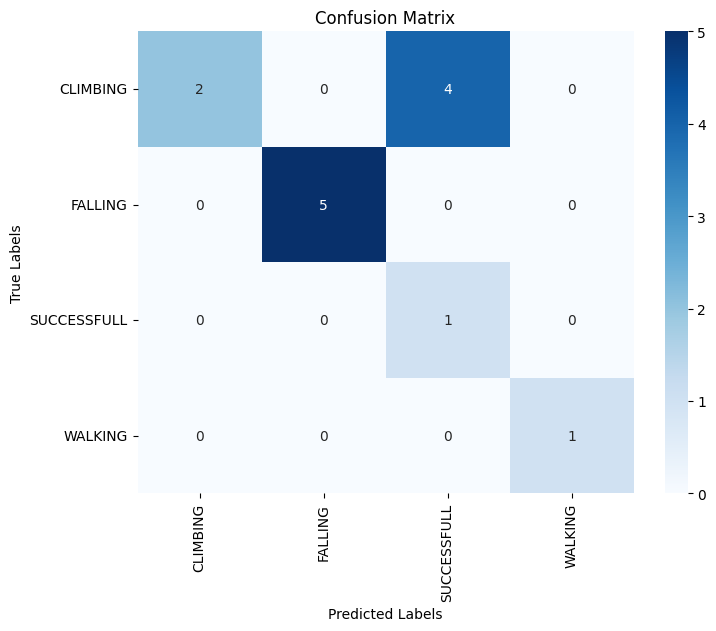

In [76]:
# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = label_encoder.classes_

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels, rotation='vertical')
ax.yaxis.set_ticklabels(class_labels, rotation='horizontal')

# Show the plot
plt.show()

# Normalized data

In [20]:
df = pd.read_csv('prepared_data/back_2_seconds_accelerometer_only_normalized.csv')
df = df.drop(df.columns[0], axis=1)
df

,Category,Accelerometer,Duration
0,CLIMBING,"[[0.7330500483512878, 0.4930500090122223, 10.0...",2
1,CLIMBING,"[[-0.3169500231742859, 1.4239500761032104, 12....",2
2,CLIMBING,"[[0.3540000021457672, 3.427950143814087, 9.400...",2
3,CLIMBING,"[[0.2350500077009201, 3.6130502223968506, 8.53...",2
4,CLIMBING,"[[2.2360501289367676, -0.8350500464439392, 9.6...",2
...,...,...,...
207,DOWNTIME,"[[-5.512950420379639, 7.783050537109375, 1.072...",2
208,DOWNTIME,"[[-5.794950485229492, 7.659000396728516, 0.903...",2
209,DOWNTIME,"[[-5.656050205230713, 7.7470502853393555, 0.90...",2
210,DOWNTIME,"[[-5.664000034332275, 7.711050510406494, 0.691...",2


In [21]:
df = df.sample(frac=1)

In [22]:
# Convert string to list of list of floats
df['Accelerometer'] = df['Accelerometer'].apply(eval)
# df['Gyroscope'] = df['Gyroscope'].apply(eval)
# df['Magnetometer'] = df['Magnetometer'].apply(eval)

In [23]:
df['Accelerometer']

12     [[-5.259000301361084, 7.14900016784668, 2.3629...
146    [[-5.094000339508057, 8.722050666809082, 0.703...
70     [[-4.279950141906738, 7.82895040512085, 3.2350...
2      [[0.3540000021457672, 3.427950143814087, 9.400...
156    [[-5.946000099182129, 8.59695053100586, 0.9460...
                             ...                        
55     [[-3.7890002727508545, 7.573050498962402, 5.01...
163    [[-5.07705020904541, 7.975050449371338, 1.6930...
208    [[-5.794950485229492, 7.659000396728516, 0.903...
114    [[-6.087000370025635, 5.983050346374512, 2.650...
6      [[0.7060500383377075, 3.0640501976013184, 12.1...
Name: Accelerometer, Length: 212, dtype: object

In [24]:
def check_sublist_lengths(dataframe):
    accelerometer_col = dataframe['Accelerometer']
    for sublist in accelerometer_col:
        for subsublist in sublist:
            if len(subsublist) != 3:
                return False
    return True

In [25]:
print(check_sublist_lengths(df))

True


In [26]:
def remove_rows_by_category(data_frame_input):
    categories_to_remove = ["CLIMBING","FALLING"]
    mask = data_frame_input['Category'].isin(categories_to_remove)
    df_filtered = data_frame_input[~mask]
    return df_filtered

In [27]:
new_df = remove_rows_by_category(df)

In [28]:
new_df

,Category,Accelerometer,Duration
146,WALKING,"[[-5.094000339508057, 8.722050666809082, 0.703...",2
156,WALKING,"[[-5.946000099182129, 8.59695053100586, 0.9460...",2
106,WALKING,"[[-6.30495023727417, 5.659950256347656, 2.9689...",2
113,WALKING,"[[-4.308000087738037, 7.479000568389893, 2.040...",2
138,WALKING,"[[-3.30495023727417, 7.5199503898620605, 1.023...",2
...,...,...,...
129,WALKING,"[[-2.266050100326538, 7.489050388336182, 4.060...",2
171,DOWNTIME,"[[-5.041050434112549, 7.98900032043457, 1.7220...",2
163,DOWNTIME,"[[-5.07705020904541, 7.975050449371338, 1.6930...",2
208,DOWNTIME,"[[-5.794950485229492, 7.659000396728516, 0.903...",2


### Binary classification

In [29]:
X_accelerometer = new_df['Accelerometer']

# Convert 'Accelerometer' column to a 2D NumPy array
X = np.array([np.mean(np.array(sample), axis=0) for sample in X_accelerometer])

# Split data into features (X) and labels (y)
y = new_df['Category'].values

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(3,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
precision = metrics.Precision()

# Compile and train the model
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1)

Epoch 1/200
84/84 [==============================] - 1s 1ms/step - loss: 1.6636 - accuracy: 0.5000
Epoch 2/200
84/84 [==============================] - 0s 1ms/step - loss: 1.0041 - accuracy: 0.5000
Epoch 3/200
84/84 [==============================] - 0s 1ms/step - loss: 0.8068 - accuracy: 0.5000
Epoch 4/200
84/84 [==============================] - 0s 1ms/step - loss: 0.7317 - accuracy: 0.5000
Epoch 5/200
84/84 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 6/200
84/84 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.5000
Epoch 7/200
84/84 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.5000
Epoch 8/200
84/84 [==============================] - 0s 1ms/step - loss: 0.6434 - accuracy: 0.5119
Epoch 9/200
84/84 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.5952
Epoch 10/200
84/84 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.6667
Epoch 11/

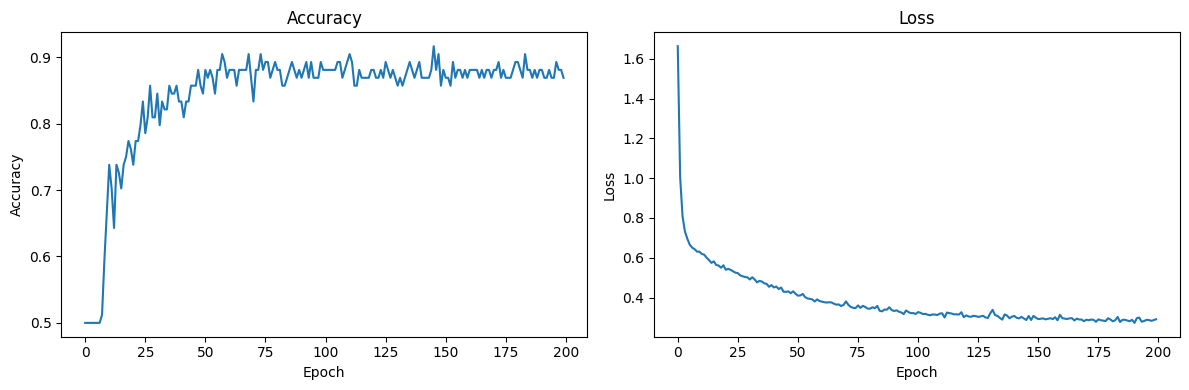

In [31]:
display_training_plot(history)

In [32]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

1/1 [==============================] - 0s 138ms/step - loss: 0.1893 - accuracy: 0.9545
Test Loss: 0.18932628631591797
Test Accuracy: 0.9545454382896423


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x145b9bcd0>>

### Multi class classification

In [141]:
X_accelerometer = df['Accelerometer']

# Convert 'Accelerometer' column to a 2D NumPy array
X = np.array([np.mean(np.array(sample), axis=0) for sample in X_accelerometer])

# Split data into features (X) and labels (y)
y = df['Category'].values

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [68]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(3,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
precision = metrics.Precision()

# Compile and train the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=8)

Epoch 1/200
16/16 [==============================] - 1s 2ms/step - loss: 1.3668 - accuracy: 0.2598
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 1.1151 - accuracy: 0.4488
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.9586 - accuracy: 0.7795
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.8507 - accuracy: 0.8504
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7648 - accuracy: 0.8661
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.8504
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.8268
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.8425
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8346
Epoch 10/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.8898
Epoch 11/

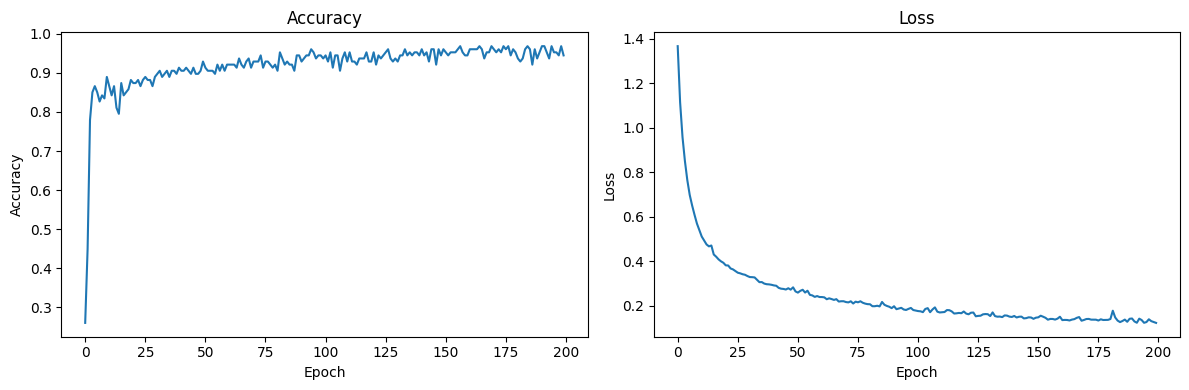

In [69]:
display_training_plot(history)

3/3 [==============================] - 0s 2ms/step


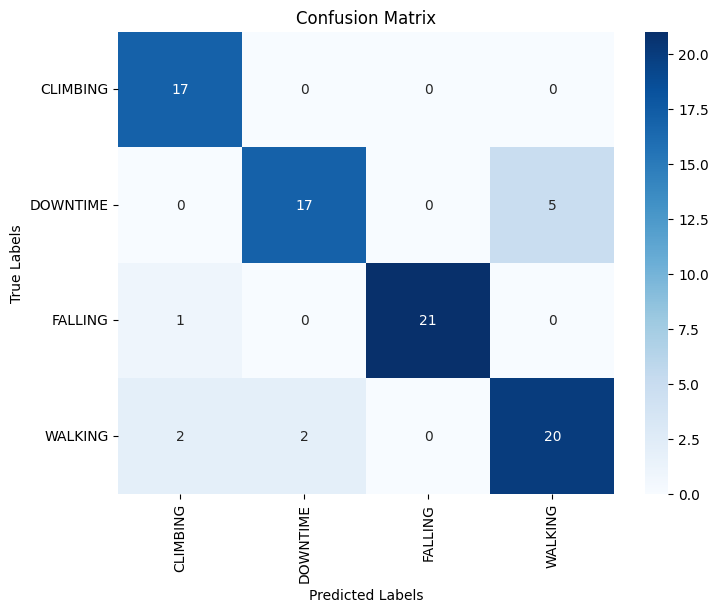

In [70]:
# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = label_encoder.classes_

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels, rotation='vertical')
ax.yaxis.set_ticklabels(class_labels, rotation='horizontal')

# Show the plot
plt.show()

### File's parts mutli class classification

In [36]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

2/2 [==============================] - 0s 5ms/step - loss: 0.1243 - accuracy: 0.9302
Test Loss: 0.12429673969745636
Test Accuracy: 0.930232584476471


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x146951c50>>

In [170]:
# Przygotowanie danych wejściowych
X = np.array([np.array(sample) for sample in X_accelerometer],dtype=object)  # Zmieniamy na listę list

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kodowanie etykiet
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tworzenie modelu
model = keras.Sequential([
    keras.layers.SimpleRNN(64, input_shape=(None, 3)),  # None oznacza zmiennej długości sekwencji
    keras.layers.Dense(4, activation='softmax')
])
# Przekształcenie danych wejściowych do oczekiwanego formatu
X_train = np.expand_dims(X_train, axis=0)
y_train = np.expand_dims(y_train, axis=0)
X_test = np.expand_dims(X_test, axis=0)
y_test = np.expand_dims(y_test, axis=0)

# Konwersja danych wejściowych na listy
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test = X_test.tolist()
y_test = y_test.tolist()

# Konwersja danych wejściowych na tensor nieregularny
X_train = tf.ragged.constant(X_train)
y_train = tf.ragged.constant(y_train)
X_test = tf.ragged.constant(X_test)
y_test = tf.ragged.constant(y_test)

# Tworzenie zestawu danych TensorFlow z pojedynczymi przykładami
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Kompilacja i trening modelu
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(dataset, epochs=200, batch_size=1)



Epoch 1/200


2023-06-18 22:15:25.588984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype variant and shape [1]
	 [[{{node Placeholder/_1}}]]


1/1 [==============================] - 2s 2s/step - loss: 1.8077 - accuracy: 0.4201
Epoch 2/200
1/1 [==============================] - 0s 55ms/step - loss: 1.7035 - accuracy: 0.4497
Epoch 3/200
1/1 [==============================] - 0s 53ms/step - loss: 1.6045 - accuracy: 0.4793
Epoch 4/200
1/1 [==============================] - 0s 48ms/step - loss: 1.5114 - accuracy: 0.5089
Epoch 5/200
1/1 [==============================] - 0s 48ms/step - loss: 1.4249 - accuracy: 0.5266
Epoch 6/200
1/1 [==============================] - 0s 52ms/step - loss: 1.3452 - accuracy: 0.5266
Epoch 7/200
1/1 [==============================] - 0s 51ms/step - loss: 1.2735 - accuracy: 0.5207
Epoch 8/200
1/1 [==============================] - 0s 46ms/step - loss: 1.2116 - accuracy: 0.5444
Epoch 9/200
1/1 [==============================] - 0s 48ms/step - loss: 1.1620 - accuracy: 0.5503
Epoch 10/200
1/1 [==============================] - 0s 47ms/step - loss: 1.1264 - accuracy: 0.6923
Epoch 11/200
1/1 [===============

In [171]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

2023-06-18 22:15:38.788494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype variant and shape [1]
	 [[{{node Placeholder/_1}}]]


1/1 [==============================] - 0s 271ms/step - loss: 0.3715 - accuracy: 0.8372
Test Loss: 0.3714538812637329
Test Accuracy: 0.8372092843055725


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x14b3f8890>>

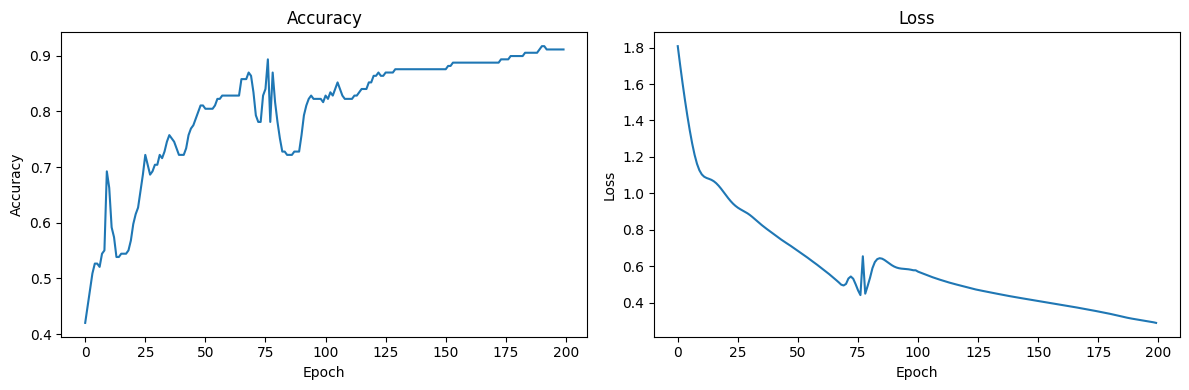

In [172]:
display_training_plot(history)

In [99]:
# Przygotowanie pliku do przetestowania
downtime_part = df[df["Category"] == "DOWNTIME"]['Accelerometer'].iloc[0]
climbing_part = df[df["Category"] == "CLIMBING"]['Accelerometer'].iloc[0]
falling_part = df[df["Category"] == "FALLING"]['Accelerometer'].iloc[0]
walking_part = df[df["Category"] == "WALKING"]['Accelerometer'].iloc[4]

test_labels_list = ['DOWNTIME','CLIMBING','FALLING','WALKING']
test_labels = np.array(test_labels_list)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(test_labels)

file = []
file.append(downtime_part)
file.append(climbing_part)
file.append(falling_part)
file.append(walking_part)

In [160]:
# X_test = np.array([np.array(sample) for sample in file])  # Zmieniamy na listę list

# # Przekształcenie danych testowych do oczekiwanego formatu
# X_test = np.expand_dims(X_test, axis=0)
# X_test = X_test.tolist()
# X_test = tf.ragged.constant(X_test)

# Ewaluacja modelu na danych testowych
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Odkodowanie etykiet
decoded_labels = label_encoder.inverse_transform(predicted_labels)

good_count = 0
bad_count = 0
correct_labels = tf.gather(y_test, 0).numpy()
# Wyświetlenie sklasyfikowanych części
for i, part in enumerate(decoded_labels):
    print("Część", i+1, ":", part)
    if(correct_labels[i] == part):
        good_count += 1
    else:
        bad_count +=1
print(f'Correctly predictied: {good_count}')
print(f'Uncorrectly predictied: {bad_count}')

1/1 [==============================] - 0s 186ms/step
Część 1 : 0
Część 2 : 1
Część 3 : 1
Część 4 : 0
Część 5 : 3
Część 6 : 1
Część 7 : 3
Część 8 : 1
Część 9 : 2
Część 10 : 1
Część 11 : 2
Część 12 : 0
Część 13 : 1
Część 14 : 3
Część 15 : 1
Część 16 : 3
Część 17 : 3
Część 18 : 3
Część 19 : 3
Część 20 : 2
Część 21 : 0
Część 22 : 1
Część 23 : 2
Część 24 : 2
Część 25 : 3
Część 26 : 0
Część 27 : 0
Część 28 : 0
Część 29 : 2
Część 30 : 0
Część 31 : 2
Część 32 : 3
Część 33 : 1
Część 34 : 2
Część 35 : 1
Część 36 : 2
Część 37 : 3
Część 38 : 0
Część 39 : 1
Część 40 : 2
Część 41 : 1
Część 42 : 2
Część 43 : 1
Correctly predictied: 38
Uncorrectly predictied: 5
